### Import the libraries

In [1]:
#pip install keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

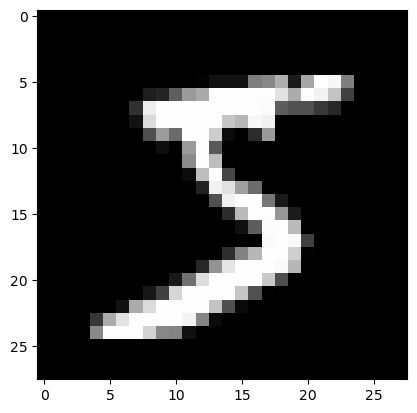

In [5]:
plt.imshow(x_train[0],cmap='gray')

In [6]:
y_train[0]

5

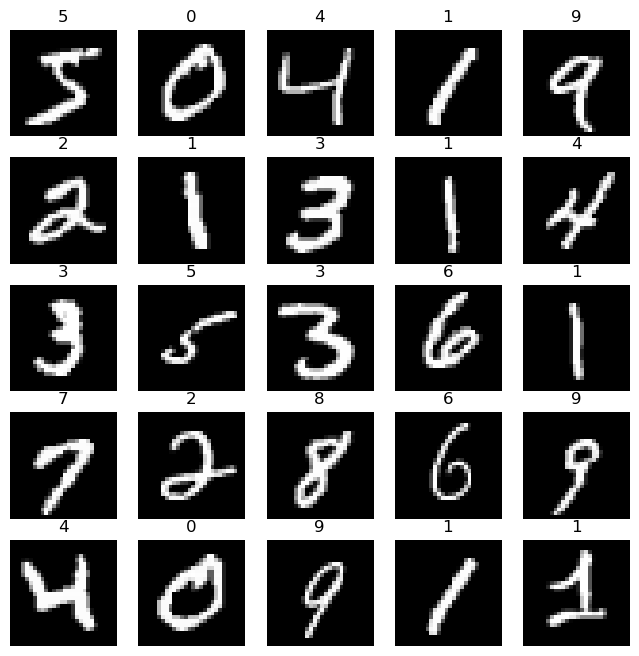

In [7]:
plt.figure(figsize=(8,8))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

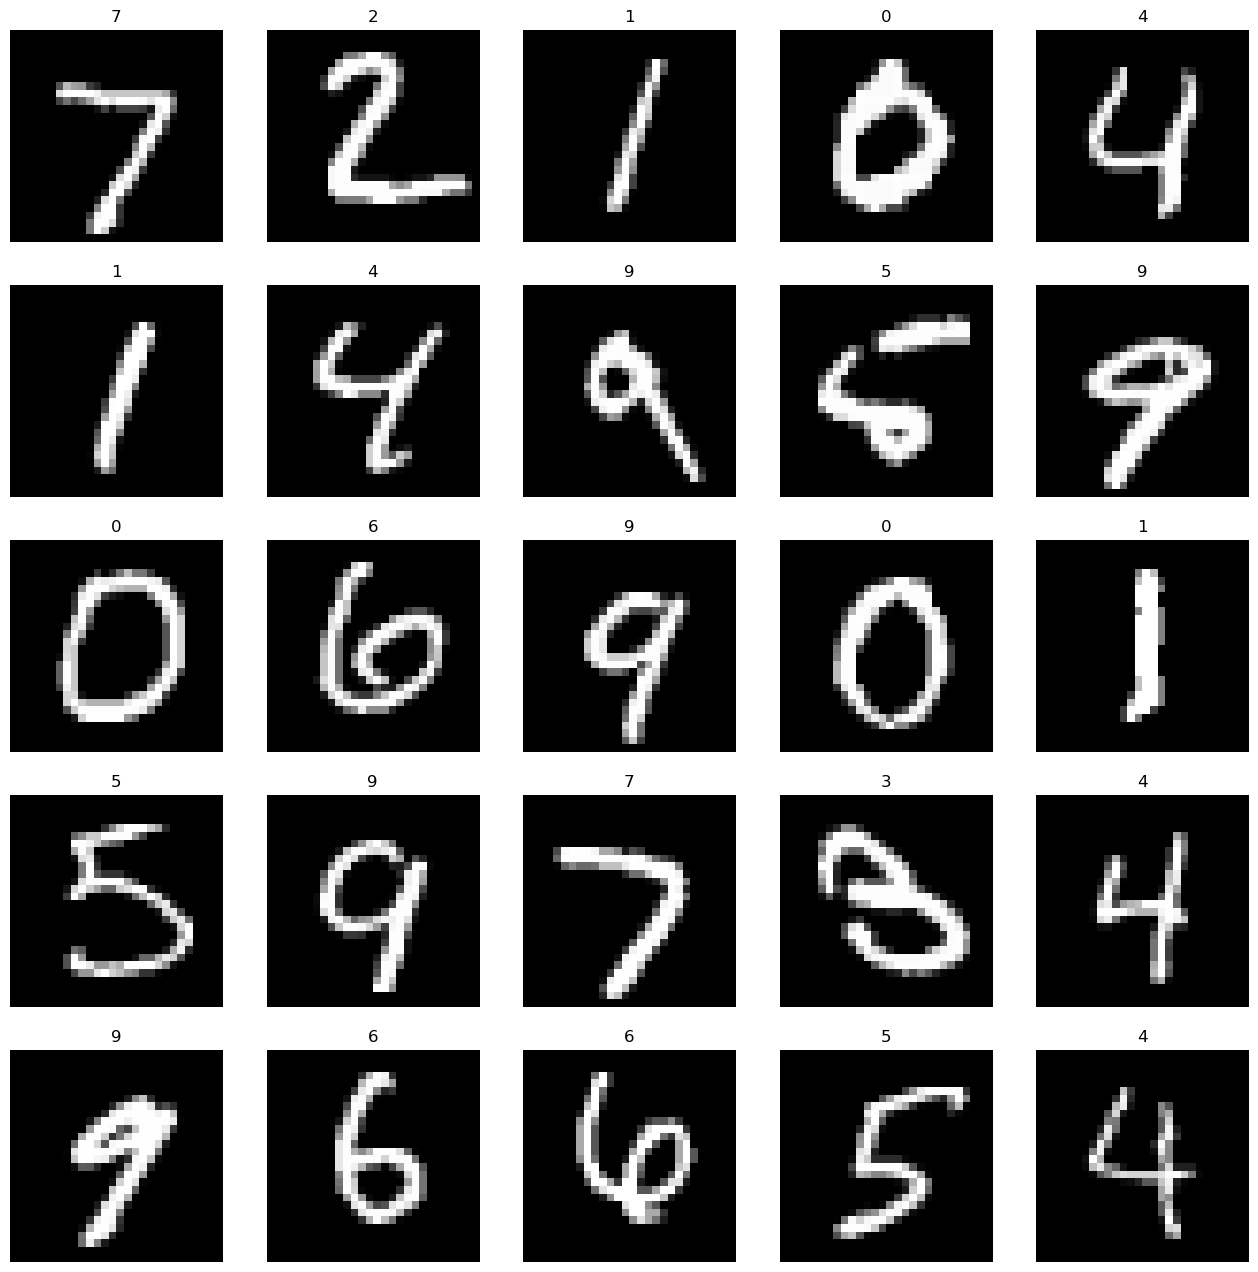

In [37]:
plt.figure(figsize=(16,16))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

### Data preparation 

In [9]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalize

In [10]:
x_train = x_train / 255
x_test = x_test /255

##### Convert 2D data to 1D

In [11]:
x_train[0].shape

(28, 28)

In [12]:
x_train[0].size

784

In [13]:
m =np.array([[6,3,1],
            [8,9,7]])

In [14]:
m.flatten()

array([6, 3, 1, 8, 9, 7])

In [15]:
m.reshape(m.size)

array([6, 3, 1, 8, 9, 7])

In [16]:
np.reshape(m,m.size)

array([6, 3, 1, 8, 9, 7])

In [17]:
x_train= x_train.reshape(-1,x_train[0].size)
x_test= x_test.reshape(-1,x_test[0].size)

In [18]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

##### Prepare the output variable 

In [19]:
import seaborn as sns

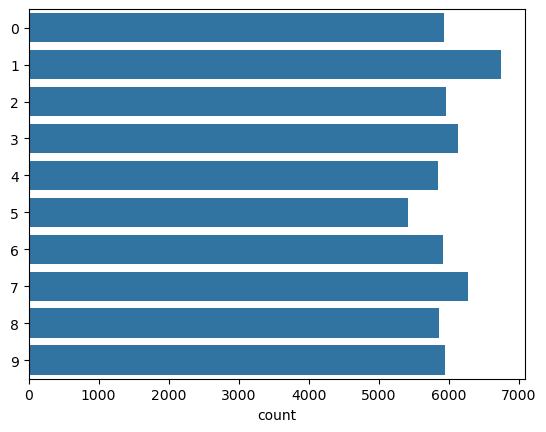

In [20]:
sns.countplot(y=y_train);

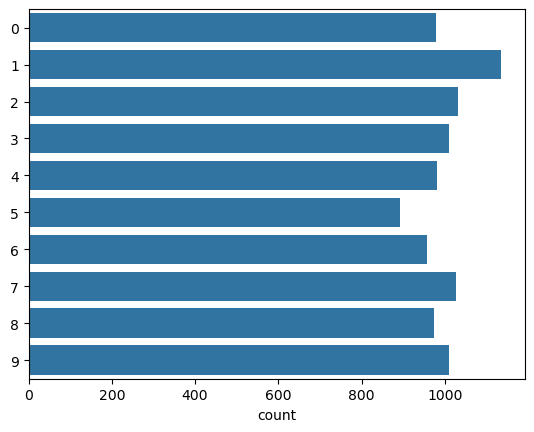

In [21]:
sns.countplot(y=y_test);


In [22]:
y_train.shape

(60000,)

In [23]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Build the model

In [26]:
model = Sequential()

#Input layer
model.add(Dense(512, input_shape=(784,), activation='relu'))

#Hidden layer 
model.add(Dense(128, activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#pip install pydot

In [29]:
plot_model(model, show_layer_activations=True,show_layer_names=True,show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

### Compile the model

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

###

### train the model

In [31]:
history =model.fit (x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 28s 4ms/step - loss: 0.1831 - accuracy: 0.9435
Epoch 2/10
6000/6000 [==============================] - 27s 4ms/step - loss: 0.0865 - accuracy: 0.9737
Epoch 3/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0623 - accuracy: 0.9807
Epoch 4/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 6/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0356 - accuracy: 0.9894
Epoch 7/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0342 - accuracy: 0.9899
Epoch 8/10
6000/6000 [==============================] - 27s 4ms/step - loss: 0.0283 - accuracy: 0.9916
Epoch 9/10
6000/6000 [==============================] - 28s 5ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 10/10
6000/6000 [==============================] - 27s 5ms/step -

## Evaluate the model


In [32]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 26s 3ms/step - loss: 0.1109 - accuracy: 0.9817


[0.11091823875904083, 0.9817000031471252]

### Predict on new image 

In [33]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [34]:
new=x_test[1234]

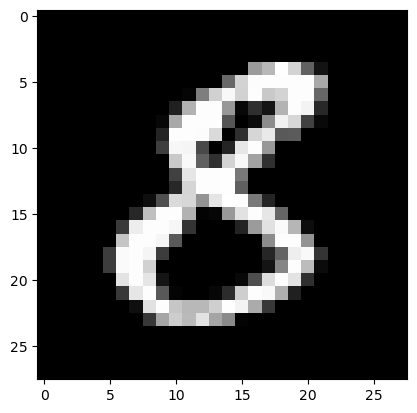

In [35]:
plt.imshow(new, cmap='gray');

In [36]:
new = new/255
new = new.reshape(1,784)
result = model.predict(new)
np.argmax(result)

1/1 [==============================] - 0s 161ms/step


8

In [98]:
import cv2

In [106]:
img=cv2.imread("seven.png",0)

In [107]:
image = cv2.resize(img,(28,28))

In [108]:
image.shape

(28, 28)

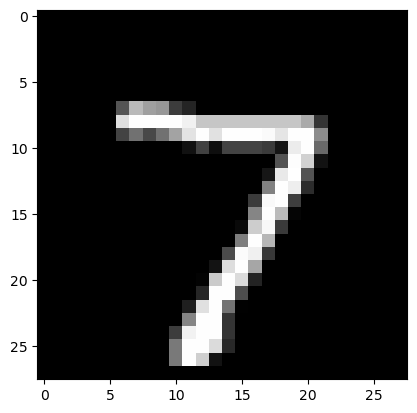

In [109]:
plt.imshow(image,cmap='gray')

In [110]:
image = image/255
image = image.reshape(1,784)

In [111]:
result = model.predict(image)
np.argmax(result)

1/1 [==============================] - 0s 31ms/step


7